<a href="https://colab.research.google.com/github/cesar97af/Programaci-n-Prueba/blob/main/Problema_de_los_dos_cuerpos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
%matplotlib inline

In [29]:
from sympy import symbols, diff, sin
E = symbols('E')
#Se calcula la derivada de la funcion f = E - e*sin(E)-M con respecto a E
E, e, M = symbols('E e M')
f = E - e*sin(E) - M
# Derivada respecto a E
df = diff(f, E)
print(df)

-e*cos(E) + 1


In [30]:
#Con class
class Keepler:
  def __init__(self, excentricidad, anomalia_media):
    self.e = excentricidad
    self.M = anomalia_media
    self.E = symbols('E')

  def funcion(self):
    return self.E - self.e*sin(self.E) - self.M

  def derivada(self):
   return diff(self.funcion(), self.E)

# Crear un objeto de la clase planeta
planeta = Keepler(e, M)  # Valores de ejemplo para e y M

# Imprimiendo la función y su derivada
print("Función: ", planeta.funcion())
print("Derivada: ", planeta.derivada())

Función:  E - M - e*sin(E)
Derivada:  -e*cos(E) + 1


In [ ]:
#Ahora vamos a definir el ciclo
"Para la funcion Función:  E - M - e*sin(E) tenemos la Derivada:  -e*cos(E) + 1"
import math

def newton_raphson(E0, M, e, epsilon, max_iter):
  E = E0
  i = 0
  while i < max_iter:
    f = E - M - e*math.sin(E)
    df = -e*math.cos(E) + 1
    E_new = E - f / df
    if abs(E_new - E) < epsilon:
      print (E_new, i)
      E = E_new
      i += 1
    print (max_iter, epsilon)

#Ingresamos los valores correspondientes a los valores que queremos calcular
e = float(input("Digite valor de la excentricidad: "))
M = float(input("Digite el valor de la anomalía media: "))
E0 = float(input("Introduce E0: "))
max_iter = int(input("Digite el Número máximo de iteraciones: "))

root, iterations = newton_raphson(E0, M, e, epsilon, max_iter)
print(f"Root {root} y {iterations} iteraciones.")

Digite valor de la excentricidad: 0.048


In [14]:
class Anomalia_Verdadera:
  def calcular_v(self, E_new, e):
    self.E_new = E_new
    self.e = e
    return math.atan((math.sqrt((1+self.e)/(1-self.e))) * math.tan(self.E_new/2))

data = Anomalia_Verdadera()
v = data.calcular_v(E0, e)

In [15]:
class distancia:
  def __init__(self, a, e):
        self.a = a
        self.e = e
  def calcular_r(self, v):
    return (self.a * (1 - self.e**2)) / (1 + self.e * math.cos(v))

a = float(input("Ingresa 'a' (semieje mayor de la órbita en kilómetros): "))
dist = distancia(a=a, e=e)
r = dist.calcular_r(v)

Ingresa 'a' (semieje mayor de la órbita en kilómetros): 774800000


In [16]:
print(f"v es {v}")
print(f"La posicion del planeta es a {v}rad a una distacia de {r} kilometros")
print("")
print(f"Para lograr estos resultados de una anomalia excentrica {root} se hizo {max_iter} iteraciones con un error de {epsilon}")
print("")

v es 0.5204697162768391
La posicion del planeta es a 0.5204697162768391rad a una distacia de 742110334.0560619 kilometros

Para lograr estos resultados de una anomalia excentrica 2.527652444315114 se hizo 3 iteraciones con un error de 0.01



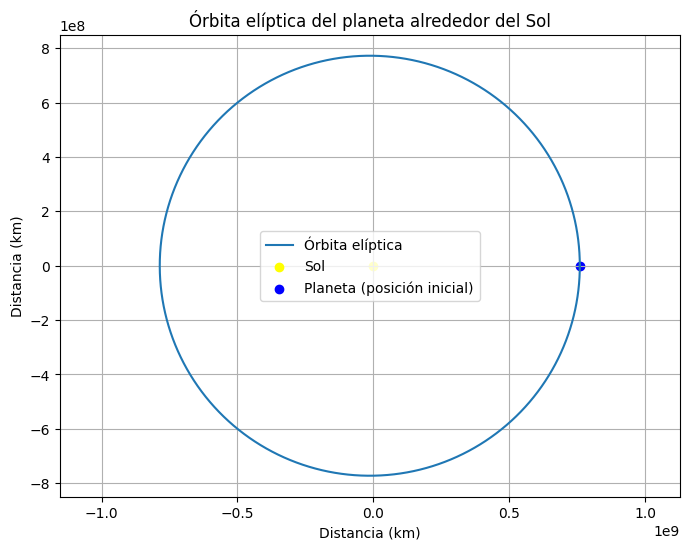

In [10]:
a_km = {a}
e = {e}
theta_rad = {root}

r_km = a_km * (1 - e**2) / (1 + e * np.cos(theta_rad))

G = 6.674 * 10**(-11)
M_kg = 1.989 * 10**30
v_km_s = np.sqrt(2 * G * M_kg / (r_km * 1000))

theta_vals = np.linspace(0, 2 * np.pi, 1000)
r_vals = a_km * (1 - e**2) / (1 + e * np.cos(theta_vals))
x_vals = r_vals * np.cos(theta_vals)
y_vals = r_vals * np.sin(theta_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="Órbita elíptica")
plt.scatter(0, 0, color='yellow', marker='o', label="Sol")
plt.scatter(x_vals[0], y_vals[0], color='blue', marker='o', label="Planeta (posición inicial)")
plt.xlabel("Distancia (km)")
plt.ylabel("Distancia (km)")
plt.title("Órbita elíptica del planeta alrededor del Sol")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()